In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cvxpy as cp

In [19]:
m = 100
X = np.random.rand(m, 2)
Y = np.zeros(m)
Y[X[:,0]+X[:,1]>1] = 1 
X_ones = X[Y==1,:]
X_zeros = X[Y==0,:]

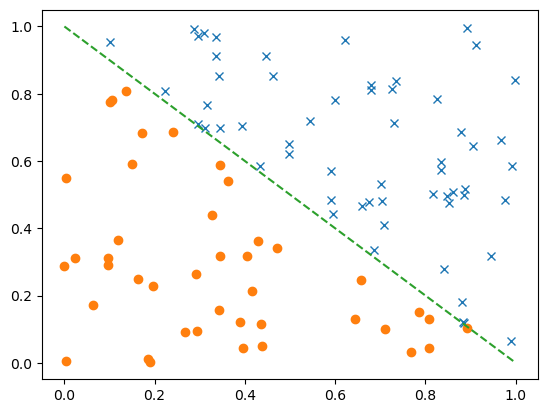

In [20]:
plt.plot(X_ones[:,0],X_ones[:,1],'x')
plt.plot(X_zeros[:,0],X_zeros[:,1],'o')
x = np.arange(0,1,0.001)
plt.plot(x,1-x,'--')


In [23]:
t = cp.Variable()
b = cp.Variable()
a = cp.Variable(2)
objective = cp.Minimize(-t)
#constraints = [X_zeros @ a<=b-t, X_ones @a >= b+t, cp.norm2(a)**2<=1]
constraints = [X_zeros @ a<=b-t, X_ones @a >= b+t]
prob = cp.Problem(objective, constraints)
max_margin = prob.solve()
print(a.value)
print(b.value)
print(max_margin)

None
None
-inf


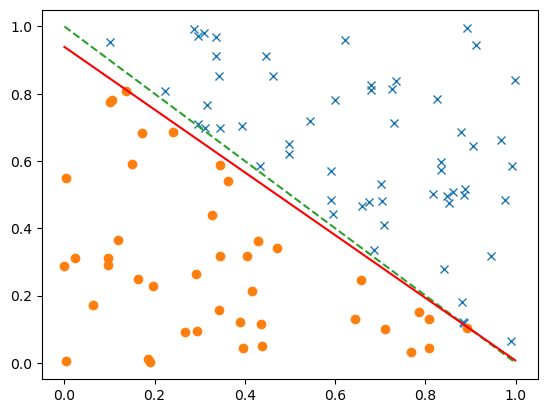

In [22]:
plt.plot(X_ones[:,0],X_ones[:,1],'x')
plt.plot(X_zeros[:,0],X_zeros[:,1],'o')
x = np.arange(0,1,0.001)
plt.plot(x,1-x,'--')
plt.plot(x, (b.value-a.value[0]*x)/a.value[1],'r-')